In [12]:
using Plots; pyplot()

Plots.PyPlotBackend()

In [13]:
include("voronoi.jl")

getVoronoiDiagram (generic function with 1 method)

# Get the Voronoi diagram for random points in a unit box

The diagram is encoded using a doubly-connected edge list (see Computational Geometry by Mark de Berg et al.).

In [14]:
sites = [(rand(), rand()) for i = 1:100];
@time voronoi = getVoronoiDiagram(sites);

  0.708014 seconds (554.37 k allocations: 27.874 MiB, 2.15% gc time)


# Draw the Voronoi diagram

v: 185
e: 284
f: 101
v - e + f = 2


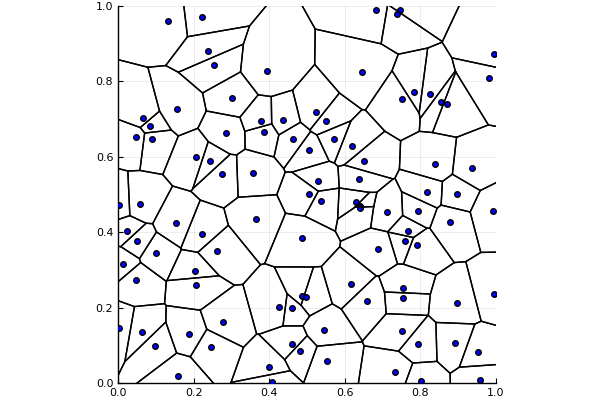

In [15]:
v = length(voronoi.vertices)
e = length(voronoi.halfedges) ÷ 2 # halfedge / 2 gives the actual number of edges
f = length(voronoi.faces) + 1 # +1 counts the external face (assuming a connected planar diagram)
println("v: ", v)
println("e: ", e)
println("f: ", f)
println("v - e + f = ", v - e + f)

plot()
for face in voronoi.faces
    scatter!(face.site, color="blue")
    
    halfedge = face.outerComponent
    while true
        p0 = halfedge.origin.coordinates
        p1 = halfedge.twin.origin.coordinates

        plot!([p0, p1], color="black")

        halfedge = halfedge.next
        if halfedge === face.outerComponent
            break
        end
    end
end
plot!(xlims=(0,1), ylims=(0,1), aspect_ratio=:equal, legend=false)

# Getting information about a given face

area: 0.005964122764883326

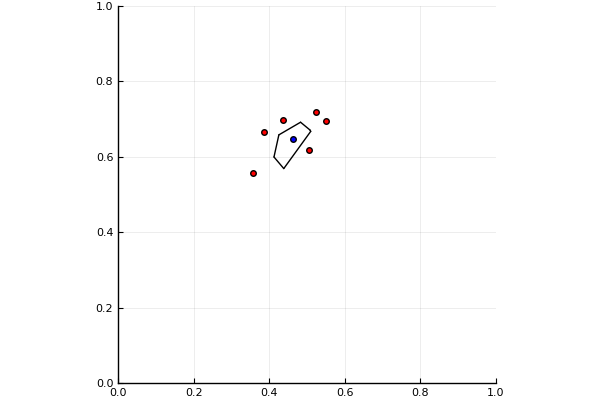

In [17]:
face = voronoi.faces[30]
area = 0.0

plot()
halfedge = face.outerComponent
while true
    p0 = halfedge.origin.coordinates
    p1 = halfedge.twin.origin.coordinates
    
    # get neighboring site
    neighbor = halfedge.twin.incidentFace.site
    scatter!(neighbor, color="red")
    
    # get area of current face
    area += p0[1]*p1[2] - p0[2]*p1[1]

    plot!([p0, p1], color="black")

    halfedge = halfedge.next
    if halfedge === face.outerComponent
        break
    end
end
print("area: ", abs(area / 2))
plot!(xlims=(0,1), ylims=(0,1), aspect_ratio=:equal, legend=false)
scatter!(face.site, color="blue")